# IIIF (International Image Interoperability Framework)

## Einführung: Warum brauchen wir IIIF?

Stell dir vor, du findest ein historisches Dokument oder ein Kunstwerk in einem Online-Archiv. Du möchtest es vergrößern, einen Ausschnitt speichern oder vielleicht sogar mit einer Version aus einem anderen Museum vergleichen. Ohne IIIF wäre das oft kompliziert, weil jede Institution ihr eigenes System nutzt.

IIIF löst dieses Problem! Es ist ein Set von offenen Standards (APIs), die es Kultureinrichtungen weltweit ermöglichen, ihre hochauflösenden Bilder und zugehörigen Daten auf einheitliche und interoperable Weise bereitzustellen.

Dank dieser Standards kannst du mit einer einzigen Anwendung (einem sogenannten "Viewer") Bilder aus der Staatsbibliothek Berlin und der Bodleian Library Oxford gleichzeitig betrachten und analysieren – ganz einfach, weil beide dieselbe digitale "Sprache" (IIIF) sprechen.

## Der Schlüssel: Image API und Presentation API

Als Datenbenutzer sind vor allem zwei der Haupt-APIs von IIIF für dich wichtig. Du kannst sie dir als zwei verschiedene Datentypen vorstellen, die dir von einer Quelle geliefert werden:

1. **Image API (Die Bild-Daten selbst)**
Was es ist: Die Image API regelt den direkten Zugriff auf das eigentliche Bild in hoher Auflösung.

Wofür du es nutzt: Es erlaubt dir, dynamisch bestimmte Teile, Größen und Rotationen des Bildes anzufordern. Du lädst nicht das gesamte riesige Originalbild herunter, sondern nur den Ausschnitt, den du gerade brauchst.

Analogie: Es ist wie ein digitaler Foto-Server. Du sagst dem Server: "Gib mir diesen kleinen Bereich (Region), in dieser Größe (Size), als JPEG (Format)."

2. **Presentation API (Der Rahmen und Kontext)**
Was es ist: Die Presentation API liefert die Metadaten und die Struktur für das Bild. Sie erklärt, WAS das Bild ist und WIE es präsentiert werden soll. Das alles geschieht in einem standardisierten Format, dem Manifest.

Wofür du es nutzt: Du erhältst Informationen wie den Titel des Werks, den Autor, die Reihenfolge der Seiten in einem Buch (bei einem Manuskript) und die Position von Anmerkungen – der Viewer weiß dank dieser Daten, wie er das Bild korrekt anzeigen muss.

Analogie: Es ist wie das Inhaltsverzeichnis und der Katalogeintrag für ein digitales Objekt. Es verpackt das Bild in einen Kontext.

## Fazit für dich als API-Nutzer
Wenn du kulturelle Daten verarbeitest, siehst du am Ende oft nur eine IIIF Manifest URL. Wenn du diese URL in deinen Code oder einen IIIF-Viewer eingibst, weißt du:

Dank der Presentation API (Manifest) bekommst du alle Metadaten und die Struktur.

Dank der Image API kannst du jedes Bild im Manifest in jeder gewünschten Form abrufen.

Ergebnis: Einfachheit, Interoperabilität und unbegrenzte Möglichkeiten, kulturelles Erbe digital zu erkunden! Lass uns sehen, wie das in der Praxis aussieht!


In [4]:
import os
from dotenv import load_dotenv
import requests
from openai import OpenAI
import json

In [2]:
load_dotenv()

True

In [3]:
client = OpenAI(
    api_key=os.getenv("OPENAI_API_KEY"),
)

# Manifest holen und die Daten anzeigen

In [5]:

iiif_manifest_link = "https://api.artic.edu/api/v1/artworks/49047/manifest.json"
iiif_manifest = requests.get(iiif_manifest_link)

manifest = iiif_manifest.json()
print(json.dumps(manifest, indent=4))



{
    "@context": "http://iiif.io/api/presentation/2/context.json",
    "@id": "https://api.artic.edu/api/v1/artworks/49047/manifest.json",
    "@type": "sc:Manifest",
    "label": "Peasant with His Hands Behind His Back",
    "description": [
        {
            "value": "",
            "language": "en"
        }
    ],
    "metadata": [
        {
            "label": "Artist / Maker",
            "value": "Rembrandt van Rijn\nDutch, 1606-1669"
        },
        {
            "label": "Medium",
            "value": "Etching on ivory laid paper"
        },
        {
            "label": "Dimensions",
            "value": "Plate: 6 \u00d7 5 cm (2 3/8 \u00d7 2 in.); Sheet: 6.5 \u00d7 5.4 cm (2 9/16 \u00d7 2 3/16 in.)"
        },
        {
            "label": "Object Number",
            "value": "1927.5140"
        },
        {
            "label": "Collection",
            "value": "<a href='http://www.artic.edu/collection' target='_blank'>Art Institute of Chicago</a>"
        }
   

# Aus Manifest-JSON beliebige Daten holen

In [6]:
work_info = {}
metadata = manifest["metadata"]

for i in metadata:
    if i["label"] == "Artist / Maker":
        work_info["creator"] = i["value"]
    else:
        continue



seq = manifest["sequences"][0]
canvases = seq["canvases"]

works = []

for j in canvases:
    work = {}
    work["title"] = j["label"]
    work["image_url"] = j["images"][0]["resource"]["@id"]
    works.append(work)

work_info["works"] = works
print(json.dumps(work_info, indent=4))

{
    "creator": "Rembrandt van Rijn\nDutch, 1606-1669",
    "works": [
        {
            "title": "Peasant with His Hands Behind His Back, 1629. Rembrandt van Rijn, Dutch, 1606-1669",
            "image_url": "https://www.artic.edu/iiif/2/d3590c85-49a9-f16b-f953-3a859580c072/full/843,/0/default.jpg"
        },
        {
            "title": "Peasant with His Hands Behind His Back, 1629. Rembrandt van Rijn, Dutch, 1606-1669",
            "image_url": "https://www.artic.edu/iiif/2/2ddebea9-07f8-3252-d38a-26a96d7079a7/full/843,/0/default.jpg"
        }
    ]
}


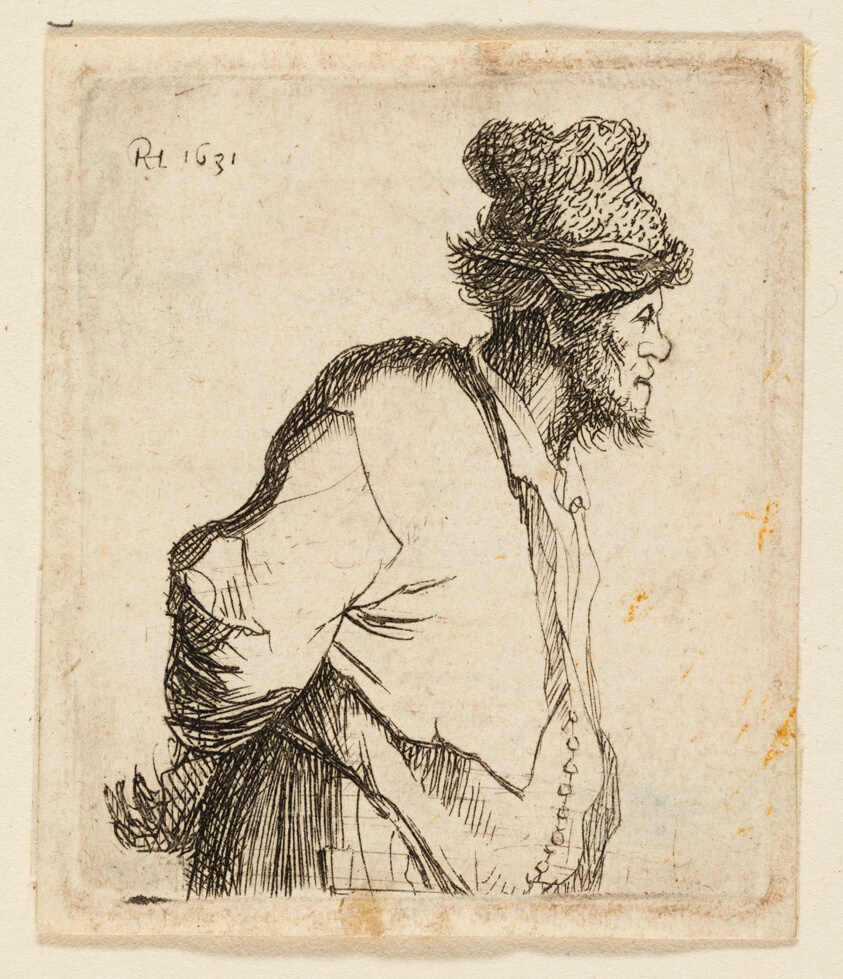

In [7]:
from PIL import Image
import io



try:
    response = requests.get(work_info["works"][0]["image_url"])
    response.raise_for_status() 

    image_bytes = io.BytesIO(response.content)
    img = Image.open(image_bytes)
    

except requests.exceptions.RequestException as e:
    print(f"Error: Das Bild konnte nicht heruntergeladen werden {e}")
except IOError as e:
    print(f"Error: Pillow konnte das Bild nicht öffnen {e}")

img

# Ein wenig spielen mit Image API 

Wie oben beschrieben, kann das Bild durch Image API modifiziert werden.
Bei Image API gibt es heute hauptsächlich 2 Versionen, nämlich Version 2 und Version 3. 
Aus dem Link zu dem Bild können wir zuerst die Version der API festlegen:

```
https://www.artic.edu/iiif/2/
```

Die Ziffer "2" im URL bedeuet, dass dieses Image API Version 2 hat. Dementsprechend können wir nach dem [Regel von Version 2.0](https://iiif.io/api/image/2.0/) das Bild modifizieren.

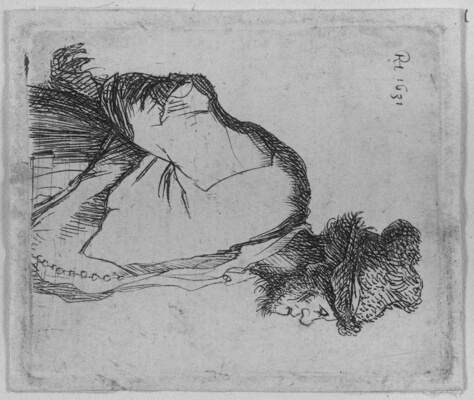

In [8]:
url_modified = "https://www.artic.edu/iiif/2/2ddebea9-07f8-3252-d38a-26a96d7079a7/full/400,/90/gray.jpg"

try:
    response_modified = requests.get(url_modified)
    response_modified.raise_for_status() 

    image_modified_bytes = io.BytesIO(response_modified.content)
    img_modified = Image.open(image_modified_bytes)
    

except requests.exceptions.RequestException as e:
    print(f"Error: Das Bild konnte nicht heruntergeladen werden {e}")
except IOError as e:
    print(f"Error: Pillow konnte das Bild nicht öffnen {e}")

img_modified


# Das Bild maschinell analyisieren

Weil das Bild leicht erreichbar ist, kann es auch maschinell einfach analysiert werden. 

Hier lassen wir es beispielsweise durch GPT-4.1-mini (ein VLM) beschreiben und ihm einige Schlagwörter vergeben.

In [19]:
user_question = f"This is a painting of {work_info['creator']}. The title of the painting is {work_info['works'][0]['title']}. \
Please create a description about this painting for the museums visitor. The text must be easy to read for every visitor. \
Additionally, please write a several key words. Key words must be marked with a hash tag. For example #ordinaly_people."

In [20]:
response = client.responses.create(
    model="gpt-4.1-mini",
    input=[{
        "role": "user",
        "content": [
            {"type": "input_text", "text": user_question},
            {
                "type": "input_image",
                "image_url": work_info["works"][0]["image_url"],
            },
        ],
    }],
)

In [21]:
print(response.output_text)

This artwork, "Peasant with His Hands Behind His Back," was created by Rembrandt van Rijn in 1629. The drawing shows a simple farmer standing with his hands behind his back, wearing a hat and plain clothes. The sketch captures the personality and daily life of an ordinary person during that time. The artist used fine lines to show details in the man’s face and clothing, giving a sense of calmness and dignity. This piece helps us understand the world of common people in the 1600s through Rembrandt’s eye.

#Rembrandt #DutchArt #1600s #Peasant #EverydayLife #Portrait #Sketch #SimplePeople #History #Art
